In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# plt.rcParams['figure.figsize'] = (10,5) 
# plt.rcParams['figure.figsize'] = (10,5.625)   # 16:9
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio

In [13]:
GlpG_seq = "ERAGPVTWVMMIACVVVFIAMQILGDQEVMLWLAWPFDPTLKFEFWRYFTHALMHFSLMHILFNLLWWWYLGGAVEKRLGSGKLIVITLISALLSGYVQQKFSGPWFGGLSGVVYALMGYVWLRGERDPQSGIYLQRGLIIFALIWIVAGWFDLFGMSMANGAHIAGLAVGLAMAFVDSLN"

In [14]:
seq = GlpG_seq
len(seq)

181

In [15]:
seq_dataFrame = pd.DataFrame({"oneLetterCode":list(seq)})
HFscales = pd.read_table("/Users/weilu/opt/small_script/Whole_residue_HFscales.txt")
# Octanol Scale
# code = {"GLY" : "G", "ALA" : "A", "LEU" : "L", "ILE" : "I",
#         "ARG+" : "R", "LYS+" : "K", "MET" : "M", "CYS" : "C",
#         "TYR" : "Y", "THR" : "T", "PRO" : "P", "SER" : "S",
#         "TRP" : "W", "ASP-" : "D", "GLU-" : "E", "ASN" : "N",
#         "GLN" : "Q", "PHE" : "F", "HIS+" : "H", "VAL" : "V",
#         "M3L" : "K", "MSE" : "M", "CAS" : "C" }
code = {"GLY" : "G", "ALA" : "A", "LEU" : "L", "ILE" : "I",
        "ARG+" : "R", "LYS+" : "K", "MET" : "M", "CYS" : "C",
        "TYR" : "Y", "THR" : "T", "PRO" : "P", "SER" : "S",
        "TRP" : "W", "ASP-" : "D", "GLU-" : "E", "ASN" : "N",
        "GLN" : "Q", "PHE" : "F", "HIS0" : "H", "VAL" : "V",
        "M3L" : "K", "MSE" : "M", "CAS" : "C" }
HFscales_with_oneLetterCode = HFscales.assign(oneLetterCode = HFscales.AA.str.upper().map(code)).dropna()
data = seq_dataFrame.merge(HFscales_with_oneLetterCode, on="oneLetterCode", how="left")

In [16]:
def isHelix2(id):
    helices_list = [(95,114), (148,169), (171, 193), (201, 217), (227, 241), (251, 268)]
    for count, (i, j) in enumerate(helices_list):
        if id >= i and id <= j:
            return 1+count
    return 0
data["resId"] = 91 + data.index
data["isHelix"] = data["resId"].apply(isHelix2)

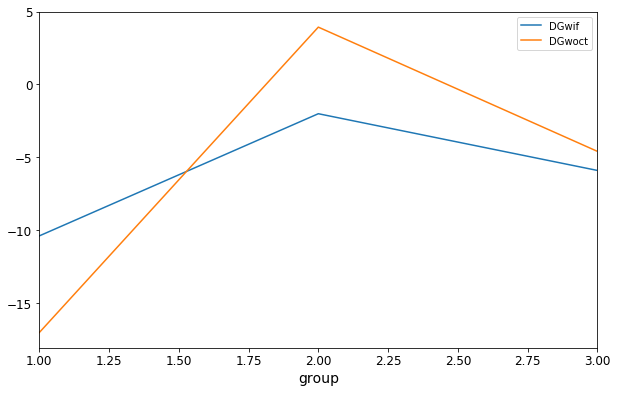

In [17]:
a = data.groupby("isHelix").sum()[1:].reset_index()
a["group"] = (a["isHelix"]+1) // 2
b = a.groupby("group").sum()
b.drop(["resId", "isHelix", "Oct-IF"],axis=1).plot()